In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from ipykernel import kernelapp as app
df=pd.read_csv("cat1.csv")
df=df.drop("pred",axis=1)
df['label']=df['class']
df=df.drop("class",axis=1)
# X=df.iloc[:,:-1]
df1=df[['u','g','r','i','z','nuv_mag','fuv_mag','extinction_u','extinction_r','extinction_z']]
X=df1.iloc[:,:]
y=df[df.columns[-1]]
df1.head()

,u,g,r,i,z,nuv_mag,fuv_mag,extinction_u,extinction_r,extinction_z
0,18.286291,16.968243,16.334318,16.039885,15.857203,20.535709,22.654970,0.094921,0.051166,0.028281
1,22.734962,21.516233,20.178501,19.238029,18.809675,22.594444,22.966053,0.105131,0.056670,0.031323
2,21.223398,21.143623,21.149973,20.998989,21.145853,22.867874,24.001894,0.085433,0.046052,0.025455
3,21.771444,21.636995,21.564974,21.476393,21.266085,21.900541,22.846025,0.074157,0.039974,0.022095
4,22.767988,22.018591,21.658953,21.098751,20.734152,23.461775,24.284685,0.050161,0.027039,0.014945


In [2]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

C:\Users\parvn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[  5  10]
 [  0 148]]


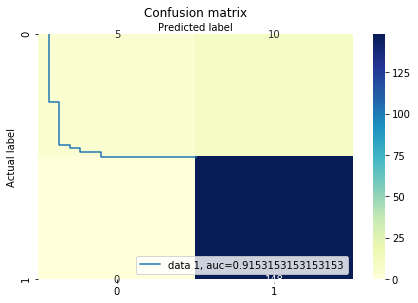

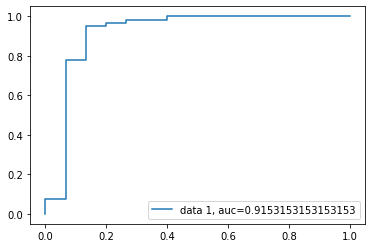

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
for x1, x2, y1,y2 in zip(forecast, forecast[1:], train_Z, train_Z[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b') # only visible if slope is zero

plt.show()

NameError: name 'forecast' is not defined

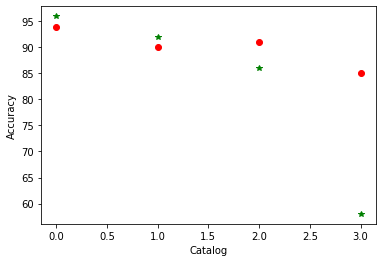

In [26]:
import matplotlib.pyplot as plt
plt.plot([96,92,86,58],'g*', [94,90,91,85], 'ro')
plt.xlabel("Catalog")
plt.ylabel("Accuracy");
plt.show()

In [3]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [4]:
%time model.fit(X, y)

C:\Users\parvn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Wall time: 19min 21s


In [5]:
print("Accuracy of LR Model : ")
preds = model.predict(X)
(preds == y).mean()

Accuracy of LR Model : 


0.9614791987673343

In [6]:
# Model Accuracy, how often is the classifier correct?

In [7]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y)
predictions = logisticRegr.predict(X)
score = logisticRegr.score(X, y)
print("Accuracy of the built-in LR model :")
print(score)

C:\Users\parvn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of the built-in LR model :
0.9414483821263482
